In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/kasey/Documents/Projects/Simple Linear Regression Model/houses.csv")
print(df)

    size(sqft)  bedrooms  floors  age  Price (1000's)
0          952         2       1   65           271.5
1         1244         3       1   64           300.0
2         1947         3       2   17           509.8
3         1725         3       2   42           394.0
4         1959         3       2   15           540.0
..         ...       ...     ...  ...             ...
95        1224         2       2   12           329.0
96        1432         2       1   43           388.0
97        1660         3       2   19           390.0
98        1212         3       1   20           356.0
99        1050         2       1   65           257.8

[100 rows x 5 columns]


In [3]:
## Take the data and turn it to an array for x and y values
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(100, 4)
(100,)


### Split the data in training and validation

In [4]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [5]:
training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 80 observations.
The validation data has 20 observations.


## Plot the training data

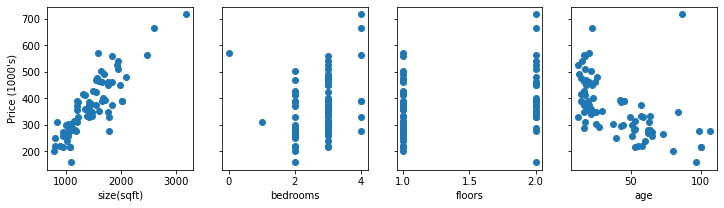

In [6]:
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,feature_count,  figsize=(12,3),  sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

## Input an inital values of w, b, and alpha

In [56]:
## Enter values in w, b and alpha

columns = ['iteration', 'J', 'w', 'b']
results = pd.DataFrame(columns = columns)
w = np.array([500.28, -150.85, -100.0, 100.0])
b = 400.12
alpha = 0.0001

In [57]:
def scale_data(x):
    
    skyler = StandardScaler(with_mean=True, with_std=True)
    skyler.fit(x)
    x = skyler.transform(x)
    
    return x, skyler

def calculate_J(x, y, w, b):
     
    J = 0
    s = 0
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        function = (np.dot(w,xi))+b
        difference = (function-yi)**2
        s = difference + s
    J = s/(2*(len(x)))
    
    return J, w, b
    
def add_results(J, w, b, iteration):
    new_row = {'iteration': iteration, 'J': J, 'w': w, 'b': b}
    results.loc[len(results)] = new_row   
    
def update_wb(x, y, w_init, b_init, alpha):
    
    s = 0
    for i in range(len(x_train)):
        xi = x[i]
        yi = y[i]
        function = (np.dot(w_init,xi)) + b_init
        difference = (function - yi) * xi
        s = difference + s
    s = s * (1/len(x)) *alpha
        
    w= w_init-s
    
    s=0
    for i in range(len(x_train)):
        xi = x[i]
        yi = y[i]
        function = (np.dot(w_init,xi)) + b_init
        difference = function - yi
        s = difference + s
    s = s * (1/len(x)) *alpha 
    
    b = b_init - s
    
    return w, b

def select_coef(results):
    
    min_J = results.loc[results['J'].idxmin()]
    
    model_w = np.round((min_J['w']), 2)
    model_b = round(min_J['b'],2)
    
    return model_w, model_b

def calculate_gradient_descent(x, y, w, b, alpha, iterations):
    
    x, skyler = scale_data(x)  ##skyler is the scaler object (which now contains the scaling paramter)
    
    for i in range(iterations):
        J, w, b = calculate_J(x, y, w, b)
        add_results(J, w, b, i)
    
        w, b = update_wb(x, y, w, b, alpha)
        
    model_w, model_b = select_coef(results)
    
    return results, skyler, model_w, model_b    

### Use training data to find the linear regression model

In [ ]:
results, skyler, model_w, model_b = calculate_gradient_descent(x_train, y_train, w, b, alpha, 25000)
print(results)

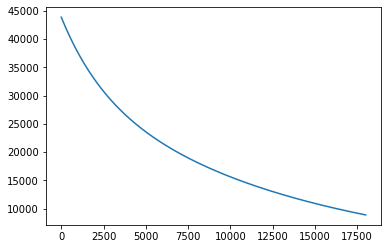

In [49]:
## Check for convergence
plt.plot(results['iteration'], results['J'])

In [50]:
print(model_w, model_b)

[ 294.03 -117.89 -112.48   20.96] 372.84


In [51]:
## Save the results of gradient descent to a spreadsheet if you want to review them
results.to_csv('temp.csv', index=False)

## Use the model to predict y

In [52]:
def predict_results(x_variable, fitted_scaler, model_w, model_b):
    
    scaled_x = fitted_scaler.transform(x_variable)
    predictions = np.array([])
    
    for i in range(len(scaled_x)):
        predicted_y = np.dot(model_w, scaled_x[i]) + model_b
        predictions = np.append(predictions,predicted_y)
    
    return predictions, scaled_x

In [53]:
predictions, scaled_x = predict_results(x_val, skyler, model_w, model_b)

In [54]:
print(model_w, model_b)

[ 294.03 -117.89 -112.48   20.96] 372.84


## Plot the predictions

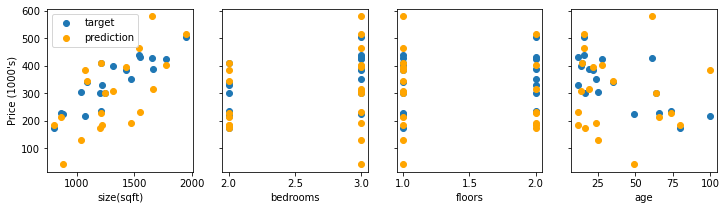

In [55]:
fig, ax=plt.subplots(1, feature_count,  figsize=(12,3),  sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_val[:,i], y_val, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_val[:,i], predictions, color=["orange"], label = 'prediction')
ax[0].set_ylabel(y_feature); ax[0].legend();
plt.show()

## Single Prediction

In [28]:
given_x = np.array([1500.0, 3.0, 2.0, 25])
given_x = given_x.reshape(1,-1)
print(given_x)

[[1500.    3.    2.   25.]]


In [30]:
predictions, scaled_x = predict_results(given_x, skyler, model_w, model_b)

In [31]:
print(predictions)

[226.69255462]


In [33]:
size = given_x[0,0]
bedrooms = round(given_x[0,1],0)
floors = round(given_x[0,2], 0)
age= given_x[0,3]
price = round((predictions[0]*1000),2)

print(f"Given a house with {size} sq ft, {bedrooms} bedrooms, {floors} floors, and {age} years of age, the expected price would be ${price}.")

Given a house with 1500.0 sq ft, 3.0 bedrooms, 2.0 floors, and 25.0 years of age, the expected price would be $226692.55.
